# Carregar e visualizar os dados

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



gastos_df = pd.read_excel("Gastos_2019.xlsx")
ideb_df = pd.read_excel("IDEB_2019.xlsx", skiprows=4)


print(" Primeiras linhas da tabela de gastos:")
display(gastos_df.head())

print(" Primeiras linhas da tabela do IDEB:")
display(ideb_df.head())


 Primeiras linhas da tabela de gastos:


Munic√≠pio  COD_MUN  UF  Popula√ß√£o  \
0           Prefeitura Municipal de Barra Funda - RS  4301958  RS       2527   
1  Prefeitura Municipal de S‚Äûo Jos√à do Hort√çncio ...  4318481  RS       4739   
2       Prefeitura Municipal de Tr√çs Cachoeiras - RS  4321667  RS      10989   
3  Prefeitura Municipal de Presidente Kubitschek ...  3153301  MG       3004   
4  Prefeitura Municipal de Santo Ant√ônio das Miss...  4317707  RS      10305   

                 Tipo de gasto  Valor do gasto (R$)  
0  12.361 - Ensino Fundamental           2022402.92  
1  12.361 - Ensino Fundamental           3855329.33  
2  12.361 - Ensino Fundamental           6953024.50  
3  12.361 - Ensino Fundamental           2208341.11  
4  12.361 - Ensino Fundamental           7019579.10

 Primeiras linhas da tabela do IDEB:


C√≥digo do Munic√≠pio      Nome do Munic√≠pio       Rede  \
0                 NaN                    NaN        NaN   
1                 NaN                    NaN        NaN   
2        CO_MUNICIPIO           NO_MUNICIPIO       REDE   
3             1100015  Alta Floresta D'Oeste  Municipal   
4             1100023              Ariquemes  Municipal   

          Nota SAEB - 2019              Unnamed: 4  \
0               Matem√°tica       L√≠ngua Portuguesa   
1                      NaN                     NaN   
2  VL_NOTA_MATEMATICA_2019  VL_NOTA_PORTUGUES_2019   
3                   196.64                  180.19   
4                   212.41                  197.65   

                   Unnamed: 5 IDEB\n2019\n(N x P)        Unnamed: 7  
0  Nota M√©dia Padronizada (N)                 NaN               NaN  
1                         NaN                 NaN              2019  
2          VL_NOTA_MEDIA_2019   VL_OBSERVADO_2019  VL_PROJECAO_2019  
3                    4.992906                 4.7               5.5  
4                    5.611315                 5.1               5.5

# Filtrar munic√≠pios da Bahia nos dados de gasto

In [34]:

gastos_ba = gastos_df[gastos_df['UF'] == 'BA'].copy()


gastos_ba['Popula√ß√£o'] = pd.to_numeric(gastos_ba['Popula√ß√£o'], errors='coerce')


gastos_ba['Gasto_per_capita'] = gastos_ba['Valor do gasto (R$)'] / gastos_ba['Popula√ß√£o']


print(" Munic√≠pios da Bahia com gasto per capita calculado:")
display(gastos_ba[['Munic√≠pio', 'COD_MUN', 'Gasto_per_capita']].head())


 Munic√≠pios da Bahia com gasto per capita calculado:


Munic√≠pio  COD_MUN  Gasto_per_capita
142     Prefeitura Municipal de Ibicoara - BA  2912202        854.105543
283   Prefeitura Municipal de Santa In√çs - BA  2927903        485.684404
1039      Prefeitura Municipal de Bonito - BA  2904050       1038.272464
1056     Prefeitura Municipal de Iramaia - BA  2914307       1055.894279
1074        Prefeitura Municipal de Ichu - BA  2913309        617.602728

# Limpeza de dados

In [35]:

ideb_df.columns = ideb_df.iloc[2]
ideb_df = ideb_df[3:].copy()


ideb_df = ideb_df.rename(columns={
    'CO_MUNICIPIO': 'COD_MUN',
    'NO_MUNICIPIO': 'Munic√≠pio',
    'REDE': 'Rede',
    'VL_OBSERVADO_2019': 'IDEB_2019'
})


ideb_municipal = ideb_df[ideb_df['Rede'] == 'Municipal'].copy()


ideb_municipal['COD_MUN'] = pd.to_numeric(ideb_municipal['COD_MUN'], errors='coerce')
ideb_municipal['IDEB_2019'] = pd.to_numeric(ideb_municipal['IDEB_2019'], errors='coerce')


cods_ba = gastos_ba['COD_MUN'].unique()
ideb_ba = ideb_municipal[ideb_municipal['COD_MUN'].isin(cods_ba)].copy()


print(" IDEB dos munic√≠pios da Bahia (rede municipal):")
display(ideb_ba[['Munic√≠pio', 'COD_MUN', 'IDEB_2019']].head())


 IDEB dos munic√≠pios da Bahia (rede municipal):


2     Munic√≠pio  COD_MUN  IDEB_2019
1826     Aba√≠ra  2900108        5.5
1827      Abar√©  2900207        5.5
1828  Acajutiba  2900306        3.8
1829   Adustina  2900355        5.0
1830  √Ågua Fria  2900405        4.2

# Juntar dados de gasto e IDEB

In [36]:

dados_dea = pd.merge(gastos_ba[['COD_MUN', 'Munic√≠pio', 'Gasto_per_capita']],
                     ideb_ba[['COD_MUN', 'IDEB_2019']],
                     on='COD_MUN')


dados_dea = dados_dea.dropna(subset=['Gasto_per_capita', 'IDEB_2019'])

dados_dea.reset_index(drop=True, inplace=True)



display(dados_dea.head())


COD_MUN                                Munic√≠pio  Gasto_per_capita  \
0  2912202    Prefeitura Municipal de Ibicoara - BA        854.105543   
1  2927903  Prefeitura Municipal de Santa In√çs - BA        485.684404   
2  2904050      Prefeitura Municipal de Bonito - BA       1038.272464   
3  2914307     Prefeitura Municipal de Iramaia - BA       1055.894279   
4  2913309        Prefeitura Municipal de Ichu - BA        617.602728   

   IDEB_2019  
0        4.5  
1        5.0  
2        5.2  
3        4.4  
4        4.9

In [37]:
import pulp

def run_dea_output_oriented(inputs, outputs, rts='crs'):
    n_dmus = inputs.shape[0]
    scores = []

    for i in range(n_dmus):
        prob = pulp.LpProblem(f"DEA_{i}", pulp.LpMaximize)

        lambdas = [pulp.LpVariable(f"lambda_{j}", lowBound=0) for j in range(n_dmus)]
        theta = pulp.LpVariable("theta", lowBound=0)

        # Maximizar theta
        prob += theta

        # Restri√ß√£o de output
        prob += pulp.lpSum([lambdas[j] * outputs[j][0] for j in range(n_dmus)]) >= theta * outputs[i][0]

        # Restri√ß√µes de input
        for k in range(inputs.shape[1]):
            prob += pulp.lpSum([lambdas[j] * inputs[j][k] for j in range(n_dmus)]) <= inputs[i][k]

        # Retornos vari√°veis de escala
        if rts == 'vrs':
            prob += pulp.lpSum(lambdas) == 1

        # Resolver
        prob.solve(pulp.PULP_CBC_CMD(msg=0))

        # Score final = 1 / Œ∏
        if prob.status == pulp.LpStatusOptimal and pulp.value(theta) != 0:
            scores.append(1 / pulp.value(theta))
        else:
            scores.append(None)

    return np.array(scores)


# Calcular com a fun√ß√£o

In [38]:
inputs = dados_dea['Gasto_per_capita'].values.reshape(-1, 1)
outputs = dados_dea['IDEB_2019'].values.reshape(-1, 1)
labels = dados_dea['Munic√≠pio'].values

In [39]:

scores_crs = run_dea_output_oriented(inputs, outputs, rts='crs')
scores_vrs = run_dea_output_oriented(inputs, outputs, rts='vrs')


dados_dea['Score_CRS'] = scores_crs
dados_dea['Score_VRS'] = scores_vrs

display(dados_dea[['Munic√≠pio', 'Gasto_per_capita', 'IDEB_2019', 'Score_CRS', 'Score_VRS']])


Munic√≠pio  Gasto_per_capita  \
0           Prefeitura Municipal de Ibicoara - BA        854.105543   
1         Prefeitura Municipal de Santa In√çs - BA        485.684404   
2             Prefeitura Municipal de Bonito - BA       1038.272464   
3            Prefeitura Municipal de Iramaia - BA       1055.894279   
4               Prefeitura Municipal de Ichu - BA        617.602728   
..                                            ...               ...   
378          Prefeitura Municipal de Andara√å - BA        714.444026   
379          Prefeitura Municipal de Caatiba - BA        727.678718   
380  Prefeitura Municipal de Barra da Estiva - BA        630.363025   
381   Prefeitura Municipal de Rio do Ant√ônio - BA        837.394817   
382         Prefeitura Municipal de Macarani - BA        897.784896   

     IDEB_2019  Score_CRS  Score_VRS  
0          4.5   0.004284   0.635802  
1          5.0   0.008370   0.778178  
2          5.2   0.004072   0.712329  
3          4.4   0.003388   0.602740  
4          4.9   0.006451   0.732723  
..         ...        ...        ...  
378        5.9   0.006715   0.857582  
379        5.4   0.006034   0.782131  
380        6.0   0.007739   0.893823  
381        5.3   0.005146   0.751267  
382        5.5   0.004981   0.770566  

[383 rows x 5 columns]

# Top 10 municipios 

In [40]:

top10_crs = dados_dea.sort_values(by='Score_CRS', ascending=False).head(10)
print(" Top 10 munic√≠pios mais eficientes (CRS):")
display(top10_crs[['Munic√≠pio', 'Score_CRS']])

bottom10_crs = dados_dea.sort_values(by='Score_CRS', ascending=True).head(10)
print(" Top 10 munic√≠pios menos eficientes (CRS):")
display(bottom10_crs[['Munic√≠pio', 'Score_CRS']])


top10_vrs = dados_dea.sort_values(by='Score_VRS', ascending=False).head(10)
print(" Top 10 munic√≠pios mais eficientes (VRS):")
display(top10_vrs[['Munic√≠pio', 'Score_VRS']])


bottom10_vrs = dados_dea.sort_values(by='Score_VRS', ascending=True).head(10)
print(" Top 10 munic√≠pios menos eficientes (VRS):")
display(bottom10_vrs[['Munic√≠pio', 'Score_VRS']])


 Top 10 munic√≠pios mais eficientes (CRS):


Munic√≠pio  Score_CRS
272  Prefeitura Municipal de Campo Alegre de Lourde...   1.000000
35   Prefeitura Municipal de Santo Ant√ônio de Jesus...   0.728394
353                 Prefeitura Municipal de Ipir¬∑ - BA   0.288616
194                 Prefeitura Municipal de Antas - BA   0.256960
329               Prefeitura Municipal de Saubara - BA   0.249919
252              Prefeitura Municipal de Almadina - BA   0.222889
191             Prefeitura Municipal de Jeremoabo - BA   0.090079
200             Prefeitura Municipal de Teol‚Äöndia - BA   0.083088
291          Prefeitura Municipal de Nova Itarana - BA   0.067699
53                Prefeitura Municipal de Boquira - BA   0.065112

 Top 10 munic√≠pios menos eficientes (CRS):


Munic√≠pio  Score_CRS
217              Prefeitura Municipal de Maetinga - BA   0.001879
363                  Prefeitura Municipal de Ca√àm - BA   0.002113
184              Prefeitura Municipal de Jucuru√Åu - BA   0.002120
306               Prefeitura Municipal de Angical - BA   0.002294
202               Prefeitura Municipal de JitaÀôna - BA   0.002458
69   Prefeitura Municipal de Muqu√àm de S‚Äûo Francisc...   0.002486
315     Prefeitura Municipal de Lafaiete Coutinho - BA   0.002486
269             Prefeitura Municipal de Quijingue - BA   0.002506
313              Prefeitura Municipal de Apuarema - BA   0.002578
294  Prefeitura Municipal de Formosa do Rio Preto - BA   0.002619

 Top 10 munic√≠pios mais eficientes (VRS):


Munic√≠pio  Score_VRS
215    Prefeitura Municipal de Lic√ånio de Almeida - BA   1.000000
291          Prefeitura Municipal de Nova Itarana - BA   1.000000
169                Prefeitura Municipal de Pojuca - BA   1.000000
35   Prefeitura Municipal de Santo Ant√ônio de Jesus...   1.000000
251                Prefeitura Municipal de Itatim - BA   1.000000
272  Prefeitura Municipal de Campo Alegre de Lourde...   1.000000
329               Prefeitura Municipal de Saubara - BA   1.000000
275                Prefeitura Municipal de Wagner - BA   0.936467
57                  Prefeitura Municipal de Irec√ç - BA   0.933114
105                Prefeitura Municipal de Cacul√à - BA   0.930530

 Top 10 munic√≠pios menos eficientes (VRS):


Munic√≠pio  Score_VRS
371                Prefeitura Municipal de Itamb√à - BA   0.465753
188              Prefeitura Municipal de Aratu√åpe - BA   0.470390
236             Prefeitura Municipal de Esplanada - BA   0.503745
331               Prefeitura Municipal de Itapebi - BA   0.506849
253  Prefeitura Municipal de Cabaceiras do Paragua√Å...   0.506849
77                Prefeitura Municipal de Mascote - BA   0.506849
118               Prefeitura Municipal de Arataca - BA   0.506849
335            Prefeitura Municipal de Nova Cana‚Äû - BA   0.524289
131             Prefeitura Municipal de Lajedinho - BA   0.527125
308                 Prefeitura Municipal de Conde - BA   0.534247

- **Munic√≠pios eficientes (Score = 1.000)** indicam **gest√£o otimizada** dos recursos educacionais, servindo como **refer√™ncia para boas pr√°ticas**.
- **Munic√≠pios com baixa efici√™ncia** podem precisar **revisar pol√≠ticas educacionais** para melhorar o IDEB sem aumentar excessivamente os gastos.
- **Compara√ß√£o entre CRS e VRS** mostra diferen√ßas de escala, sugerindo que alguns munic√≠pios podem estar **subutilizando seus investimentos** ou **necessitando ajustes na gest√£o**.

- Esses resultados podem auxiliar gestores p√∫blicos na **tomada de decis√µes** para aprimorar pol√≠ticas educacionais e aumentar a efici√™ncia da aplica√ß√£o dos recursos.




# Prepara√ß√£o dos dados

In [41]:

dados_dea['IDEB_ideal_CRS'] = dados_dea['IDEB_2019'] / dados_dea['Score_CRS']
dados_dea['IDEB_ideal_VRS'] = dados_dea['IDEB_2019'] / dados_dea['Score_VRS']

dados_dea['Delta_IDEB_CRS'] = dados_dea['IDEB_ideal_CRS'] - dados_dea['IDEB_2019']
dados_dea['Delta_IDEB_VRS'] = dados_dea['IDEB_ideal_VRS'] - dados_dea['IDEB_2019']


top_delta_crs = dados_dea.sort_values(by='Delta_IDEB_CRS', ascending=False).head(10)
top_delta_vrs = dados_dea.sort_values(by='Delta_IDEB_VRS', ascending=False).head(10)

print(" Munic√≠pios que mais precisam melhorar o IDEB (CRS):")
display(top_delta_crs[['Munic√≠pio', 'IDEB_2019', 'IDEB_ideal_CRS', 'Delta_IDEB_CRS']])

print(" Munic√≠pios que mais precisam melhorar o IDEB (VRS):")
display(top_delta_vrs[['Munic√≠pio', 'IDEB_2019', 'IDEB_ideal_VRS', 'Delta_IDEB_VRS']])


 Munic√≠pios que mais precisam melhorar o IDEB (CRS):


Munic√≠pio  IDEB_2019  \
217              Prefeitura Municipal de Maetinga - BA        5.3   
184              Prefeitura Municipal de Jucuru√Åu - BA        5.2   
315     Prefeitura Municipal de Lafaiete Coutinho - BA        5.3   
306               Prefeitura Municipal de Angical - BA        4.8   
363                  Prefeitura Municipal de Ca√àm - BA        4.4   
365           Prefeitura Municipal de Barro Preto - BA        5.4   
202               Prefeitura Municipal de JitaÀôna - BA        4.7   
294  Prefeitura Municipal de Formosa do Rio Preto - BA        4.9   
248  Prefeitura Municipal de Contendas do Sincor¬∑ - BA        5.1   
40              Prefeitura Municipal de Wanderley - BA        5.5   

     IDEB_ideal_CRS  Delta_IDEB_CRS  
217     2821.384457     2816.084457  
184     2452.846760     2447.646760  
315     2132.221058     2126.921058  
306     2092.037568     2087.237568  
363     2081.872936     2077.472936  
365     2005.974666     2000.574666  
202     1911.911496     1907.211496  
294     1870.815982     1865.915982  
248     1853.968575     1848.868575  
40      1840.934645     1835.434645

 Munic√≠pios que mais precisam melhorar o IDEB (VRS):


Munic√≠pio  IDEB_2019  \
371                Prefeitura Municipal de Itamb√à - BA        3.4   
188              Prefeitura Municipal de Aratu√åpe - BA        3.3   
253  Prefeitura Municipal de Cabaceiras do Paragua√Å...        3.7   
331               Prefeitura Municipal de Itapebi - BA        3.7   
77                Prefeitura Municipal de Mascote - BA        3.7   
118               Prefeitura Municipal de Arataca - BA        3.7   
236             Prefeitura Municipal de Esplanada - BA        3.5   
131             Prefeitura Municipal de Lajedinho - BA        3.8   
21        Prefeitura Municipal de S√åtio do Quinto - BA        3.9   
308                 Prefeitura Municipal de Conde - BA        3.9   

     IDEB_ideal_VRS  Delta_IDEB_VRS  
371        7.300000        3.900000  
188        7.015454        3.715454  
253        7.300000        3.600000  
331        7.300000        3.600000  
77         7.300000        3.600000  
118        7.300000        3.600000  
236        6.947963        3.447963  
131        7.208917        3.408917  
21         7.300000        3.400000  
308        7.300000        3.400000

- Os munic√≠pios listados t√™m notas significativamente inferiores ao esperado, indicando que os investimentos feitos podem n√£o estar sendo convertidos em melhoria de ensino.
- No modelo CRS, algumas cidades apresentam diferen√ßas extremas, sugerindo que podem estar investindo sem obter retorno proporcional na qualidade educacional.
- No modelo VRS, h√° munic√≠pios que poderiam otimizar seus recursos para alcan√ßar melhores resultados no IDEB, indicando potenciais falhas na gest√£o.

- Esses dados s√£o cruciais para pol√≠ticas p√∫blicas voltadas √† educa√ß√£o, pois destacam quais munic√≠pios podem precisar de a√ß√µes corretivas urgentes. 


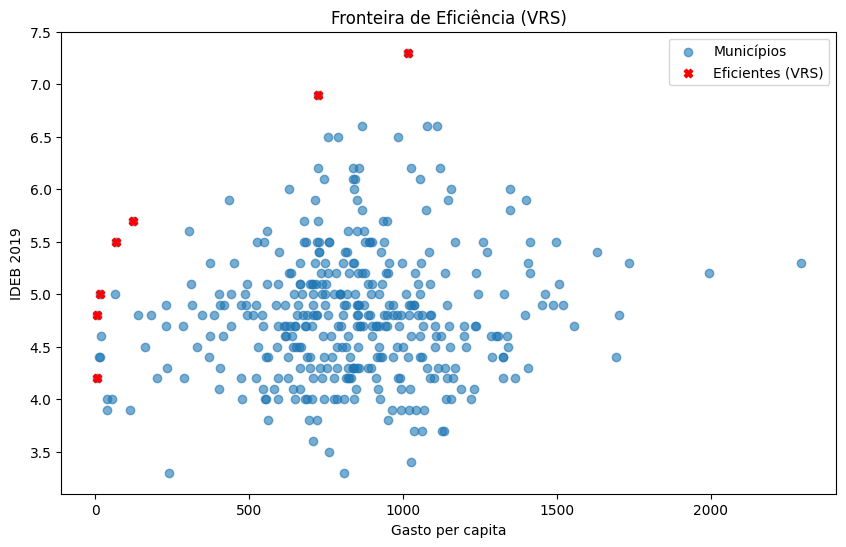

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(dados_dea['Gasto_per_capita'], dados_dea['IDEB_2019'], label='Munic√≠pios', alpha=0.6)
eficientes = dados_dea[dados_dea['Score_VRS'] == 1]
plt.scatter(eficientes['Gasto_per_capita'], eficientes['IDEB_2019'], color='red', label='Eficientes (VRS)', marker='X')
plt.xlabel('Gasto per capita')
plt.ylabel('IDEB 2019')
plt.title('Fronteira de Efici√™ncia (VRS)')
plt.legend()
plt.show()


#  O que os dados sugerem?
- Munic√≠pios eficientes (estrelas vermelhas) conseguem altos √≠ndices no IDEB sem um aumento significativo no gasto per capita.
- Munic√≠pios menos eficientes (pontos azuis abaixo da fronteira) podem estar gastando mais sem melhorar proporcionalmente a qualidade educacional.
- Existe uma tend√™ncia de que munic√≠pios mais eficientes tenham um gasto moderado, maximizando os resultados sem desperd√≠cio de recursos.

#  Interpreta√ß√£o:
Este gr√°fico √© fundamental para entender como os investimentos em educa√ß√£o impactam o desempenho escolar. Munic√≠pios que gastam muito e ainda t√™m baixos IDEBs podem precisar de revis√£o na gest√£o educacional, enquanto aqueles que atingiram a efici√™ncia podem servir de modelo de boas pr√°ticas. üöÄ



In [43]:
import pandas as pd
import geopandas as gpd
import unicodedata


dados_eficiencia_crs = {
    "Munic√≠pio": [
        "Maetinga", "Ca√©m", "Jucuru√ßu", "Angical", "Jita√∫na",
        "Muqu√©m de S√£o Francisco", "Lafaiete Coutinho", "Quijingue",
        "Apuarema", "Formosa do Rio Preto"
    ],
    "Score_CRS": [
        0.001879, 0.002113, 0.002120, 0.002294, 0.002458,
        0.002486, 0.002486, 0.002506, 0.002578, 0.002619
    ]
}

dados_eficiencia_vrs = {
    "Munic√≠pio": [
        "Lic√≠nio de Almeida", "Nova Itarana", "Pojuca", "Santo Ant√¥nio de Jesus", "Itatim",
        "Campo Alegre de Lourde", "Saubara", "Wagner", "Irec√≠", "Cacul√™"
    ],
    "Score_VRS": [
        1.000000, 1.000000, 1.000000, 1.000000, 1.000000,
        1.000000, 1.000000, 0.936467, 0.933114, 0.930530
    ]
}


resultados_df_crs = pd.DataFrame(dados_eficiencia_crs)
resultados_df_vrs = pd.DataFrame(dados_eficiencia_vrs)


def padroniza_nome(nome):
    if pd.isnull(nome):
        return ""
    return (
        unicodedata.normalize("NFKD", nome)
        .encode("ASCII", "ignore")
        .decode("utf-8")
        .upper()
        .replace("PREFEITURA MUNICIPAL DE ", "")
        .strip()
    )


resultados_df_crs["Munic√≠pio"] = resultados_df_crs["Munic√≠pio"].apply(padroniza_nome)
resultados_df_vrs["Munic√≠pio"] = resultados_df_vrs["Munic√≠pio"].apply(padroniza_nome)


shapefile_path = "29MUE250GC_SIR.shp"  
mapa_bahia = gpd.read_file(shapefile_path)
mapa_bahia["NM_MUNICIP"] = mapa_bahia["NM_MUNICIP"].apply(padroniza_nome)


# Verifica√ß√£o de colunas

In [44]:

print(dados_dea.head())


print(mapa_bahia["NM_MUNICIP"].head())

municipios_nao_encontrados = dados_dea[~dados_dea["Munic√≠pio"].isin(mapa_bahia["NM_MUNICIP"])]
print(f'Munic√≠pios n√£o encontrados: {municipios_nao_encontrados}')


   COD_MUN                                Munic√≠pio  Gasto_per_capita  \
0  2912202    Prefeitura Municipal de Ibicoara - BA        854.105543   
1  2927903  Prefeitura Municipal de Santa In√çs - BA        485.684404   
2  2904050      Prefeitura Municipal de Bonito - BA       1038.272464   
3  2914307     Prefeitura Municipal de Iramaia - BA       1055.894279   
4  2913309        Prefeitura Municipal de Ichu - BA        617.602728   

   IDEB_2019  Score_CRS  Score_VRS  IDEB_ideal_CRS  IDEB_ideal_VRS  \
0        4.5   0.004284   0.635802     1050.462990        7.077679   
1        5.0   0.008370   0.778178      597.342450        6.425266   
2        5.2   0.004072   0.712329     1276.969564        7.300000   
3        4.4   0.003388   0.602740     1298.642620        7.300000   
4        4.9   0.006451   0.732723      759.588543        6.687384   

   Delta_IDEB_CRS  Delta_IDEB_VRS  
0     1045.962990        2.577679  
1      592.342450        1.425266  
2     1271.769564        2.100

In [45]:
def limpar_nome_municipio(nome):
    nome = nome.replace("Prefeitura Municipal de", "").replace("- BA", "")
    nome = nome.strip().upper()
    nome = nome.replace("√ç", "I").replace("√å", "I").replace("√ö", "U").replace("√ô", "U")
    return nome


dados_dea["Munic√≠pio"] = dados_dea["Munic√≠pio"].apply(limpar_nome_municipio)
mapa_bahia["NM_MUNICIP"] = mapa_bahia["NM_MUNICIP"].str.upper()


In [46]:
mapa_crs = mapa_bahia.merge(dados_dea, left_on="NM_MUNICIP", right_on="Munic√≠pio", how="left")


# Corrigir erro de digita√ß√£o diretamente na coluna 'Munic√≠pio'

In [47]:

dados_dea["Munic√≠pio"] = dados_dea["Munic√≠pio"].replace(
    {"SANTO ANTUNIO DE JESUS": "SANTO ANTONIO DE JESUS"}
)



# Corrigir acentua√ß√£o incorreta em ITAMB√à

In [48]:

dados_dea["Munic√≠pio"] = dados_dea["Munic√≠pio"].replace({"ITAMB√à": "ITAMBE"})

# GRAFICOS

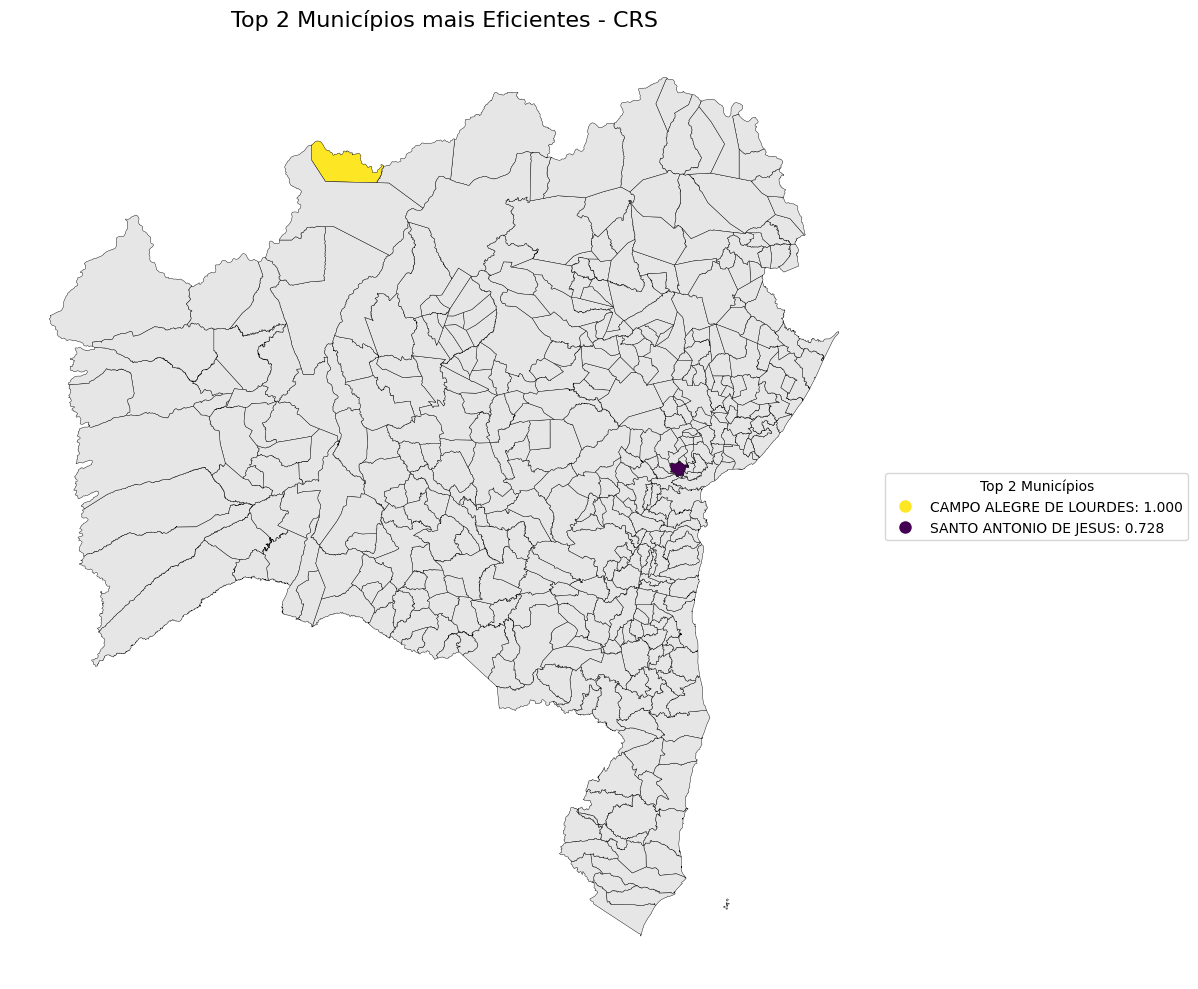

In [49]:
from matplotlib.colors import Normalize
from matplotlib import colormaps
import matplotlib.pyplot as plt


top2_crs = dados_dea.sort_values("Score_CRS", ascending=False).head(2)


mapa_crs = mapa_bahia.merge(dados_dea, left_on="NM_MUNICIP", right_on="Munic√≠pio", how="left")


mapa_crs["is_top2"] = mapa_crs["NM_MUNICIP"].isin(top2_crs["Munic√≠pio"])

norm = Normalize(vmin=top2_crs["Score_CRS"].min(), vmax=top2_crs["Score_CRS"].max())
cmap = colormaps.get_cmap("viridis") 


mapa_crs["color"] = mapa_crs.apply(
    lambda row: cmap(norm(row["Score_CRS"])) if row["is_top2"] else (0.9, 0.9, 0.9, 1), axis=1
)


fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa_crs.plot(color=mapa_crs["color"], linewidth=0.3, edgecolor='black', ax=ax)
ax.set_title("Top 2 Munic√≠pios mais Eficientes - CRS", fontsize=16)
ax.axis("off")


top2_legenda = mapa_crs[mapa_crs["is_top2"]].sort_values("Score_CRS", ascending=False)
patches = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=row['color'], markersize=10,
               label=f"{row['NM_MUNICIP']}: {row['Score_CRS']:.3f}")
    for _, row in top2_legenda.iterrows()
]
ax.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5), title="Top 2 Munic√≠pios")
plt.tight_layout()
plt.show()



- Munic√≠pios que atingem 1.000 no CRS maximizam seus resultados educacionais sem desperd√≠cio de recursos. Santo Ant√¥nio de Jesus pode ajustar estrat√©gias educacionais para elevar sua efici√™ncia ao n√≠vel de Campo Alegre de Lourdes.


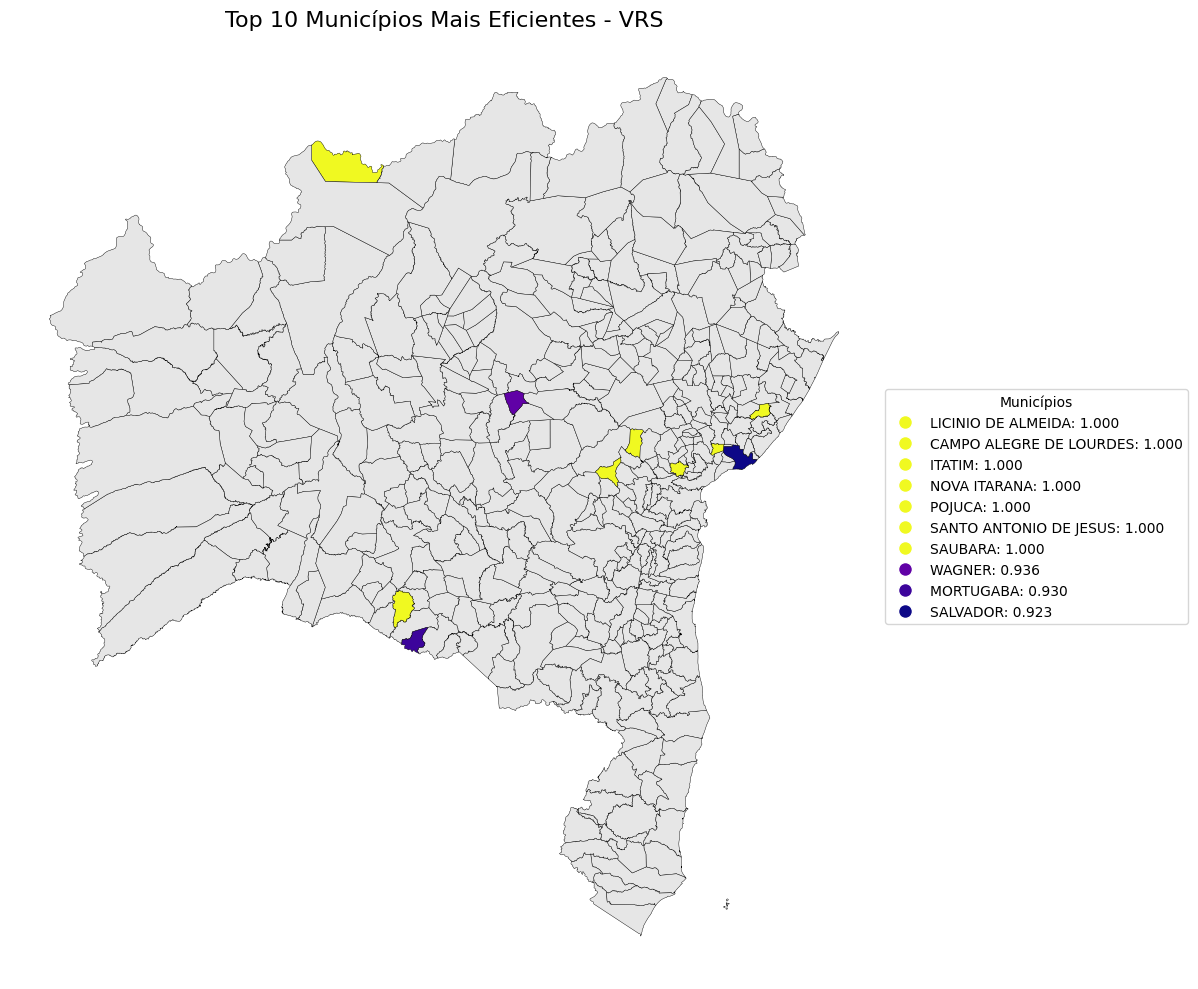

In [50]:
from matplotlib.colors import Normalize
from matplotlib import colormaps
import matplotlib.pyplot as plt


top8_vrs = dados_dea.sort_values("Score_VRS", ascending=False).head(12)


mapa_top_vrs = mapa_bahia.merge(dados_dea, left_on="NM_MUNICIP", right_on="Munic√≠pio", how="left")


mapa_top_vrs["is_top8"] = mapa_top_vrs["NM_MUNICIP"].isin(top8_vrs["Munic√≠pio"])


norm = Normalize(vmin=top8_vrs["Score_VRS"].min(), vmax=top8_vrs["Score_VRS"].max())
cmap = colormaps.get_cmap("plasma") 


mapa_top_vrs["color"] = mapa_top_vrs.apply(
    lambda row: cmap(norm(row["Score_VRS"])) if row["is_top8"] else (0.9, 0.9, 0.9, 1), axis=1
)


fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa_top_vrs.plot(color=mapa_top_vrs["color"], linewidth=0.3, edgecolor='black', ax=ax)
ax.set_title("Top 10 Munic√≠pios Mais Eficientes - VRS", fontsize=16)
ax.axis("off")


legenda_top_vrs = mapa_top_vrs[mapa_top_vrs["is_top8"]].sort_values("Score_VRS", ascending=False)
patches = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=row['color'], markersize=10,
               label=f"{row['NM_MUNICIP']}: {row['Score_VRS']:.3f}")
    for _, row in legenda_top_vrs.iterrows()
]
ax.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5), title="Munic√≠pios")
plt.tight_layout()
plt.show()



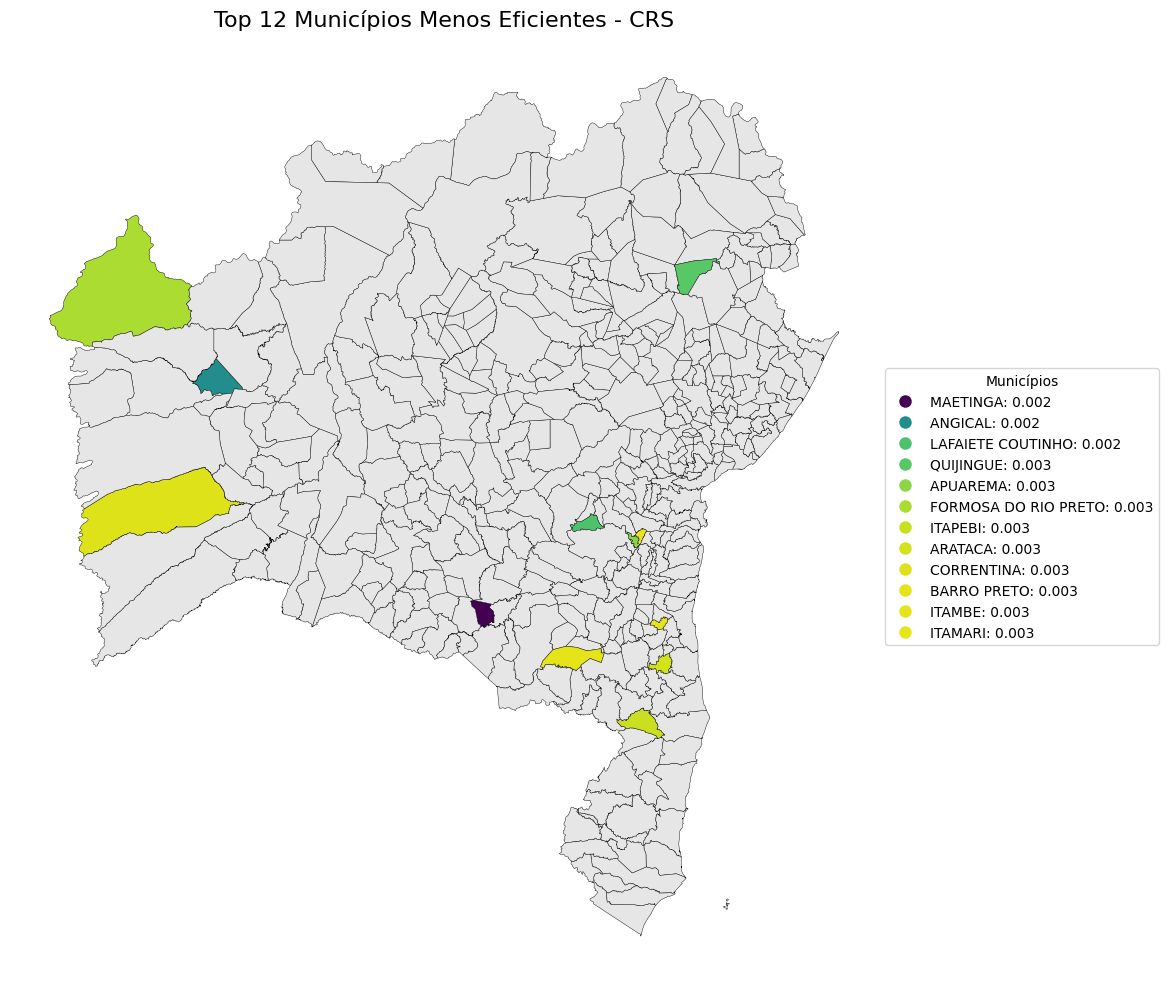

In [51]:
from matplotlib.colors import Normalize
from matplotlib import colormaps
import matplotlib.pyplot as plt


bottom8_crs = dados_dea.sort_values("Score_CRS").head(20)


mapa_bottom_crs = mapa_bahia.merge(dados_dea, left_on="NM_MUNICIP", right_on="Munic√≠pio", how="left")


mapa_bottom_crs["is_bottom8"] = mapa_bottom_crs["NM_MUNICIP"].isin(bottom8_crs["Munic√≠pio"])


norm = Normalize(vmin=bottom8_crs["Score_CRS"].min(), vmax=bottom8_crs["Score_CRS"].max())
cmap = colormaps.get_cmap("viridis")


mapa_bottom_crs["color"] = mapa_bottom_crs.apply(
    lambda row: cmap(norm(row["Score_CRS"])) if row["is_bottom8"] else (0.9, 0.9, 0.9, 1), axis=1
)


fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa_bottom_crs.plot(color=mapa_bottom_crs["color"], linewidth=0.3, edgecolor='black', ax=ax)
ax.set_title("Top 12 Munic√≠pios Menos Eficientes - CRS", fontsize=16)
ax.axis("off")


legenda_bottom_crs = mapa_bottom_crs[mapa_bottom_crs["is_bottom8"]].sort_values("Score_CRS")
patches = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=row['color'], markersize=10,
               label=f"{row['NM_MUNICIP']}: {row['Score_CRS']:.3f}")
    for _, row in legenda_bottom_crs.iterrows()
]
ax.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5), title="Munic√≠pios")
plt.tight_layout()
plt.show()


#  Top 12 Munic√≠pios Menos Eficientes (CRS)
Este mapa destaca os 12 munic√≠pios menos eficientes segundo o modelo CRS, mostrando onde os investimentos em educa√ß√£o n√£o est√£o sendo convertidos em desempenho esperado no IDEB.
## Principais munic√≠pios com baixa efici√™ncia:
- Maetinga (Score: 0.002) ‚Äî O munic√≠pio com menor efici√™ncia CRS, indicando desafios severos na gest√£o educacional.
- Angical, Lafaiete Coutinho e Quijingue (Scores: entre 0.002 e 0.003) ‚Äî Munic√≠pios que tamb√©m n√£o conseguem transformar investimentos em melhoria educacional.
- Apuarema, Formosa do Rio Preto e Itapebi (Score: 0.003) ‚Äî Apresentam baixa efici√™ncia na aloca√ß√£o de recursos, sugerindo necessidade de melhoria estrutural.
- Outros munic√≠pios como Arataca, Correntina, Barro Preto, Itamb√© e Itamari tamb√©m registram efici√™ncia muito baixa, sugerindo revis√£o na gest√£o p√∫blica e uso de recursos.

## Interpreta√ß√£o dos Resultados:
- Munic√≠pios com Score abaixo de 0.003 precisam de grandes ajustes nas pol√≠ticas educacionais para evitar desperd√≠cio de investimentos.
- A baixa efici√™ncia pode ser resultado de m√° gest√£o, infraestrutura prec√°ria ou falta de capacita√ß√£o de professores.
- Esses munic√≠pios devem revisar o uso dos recursos p√∫blicos, pois altos investimentos sem retorno educacional indicam necessidade de reestrutura√ß√£o.




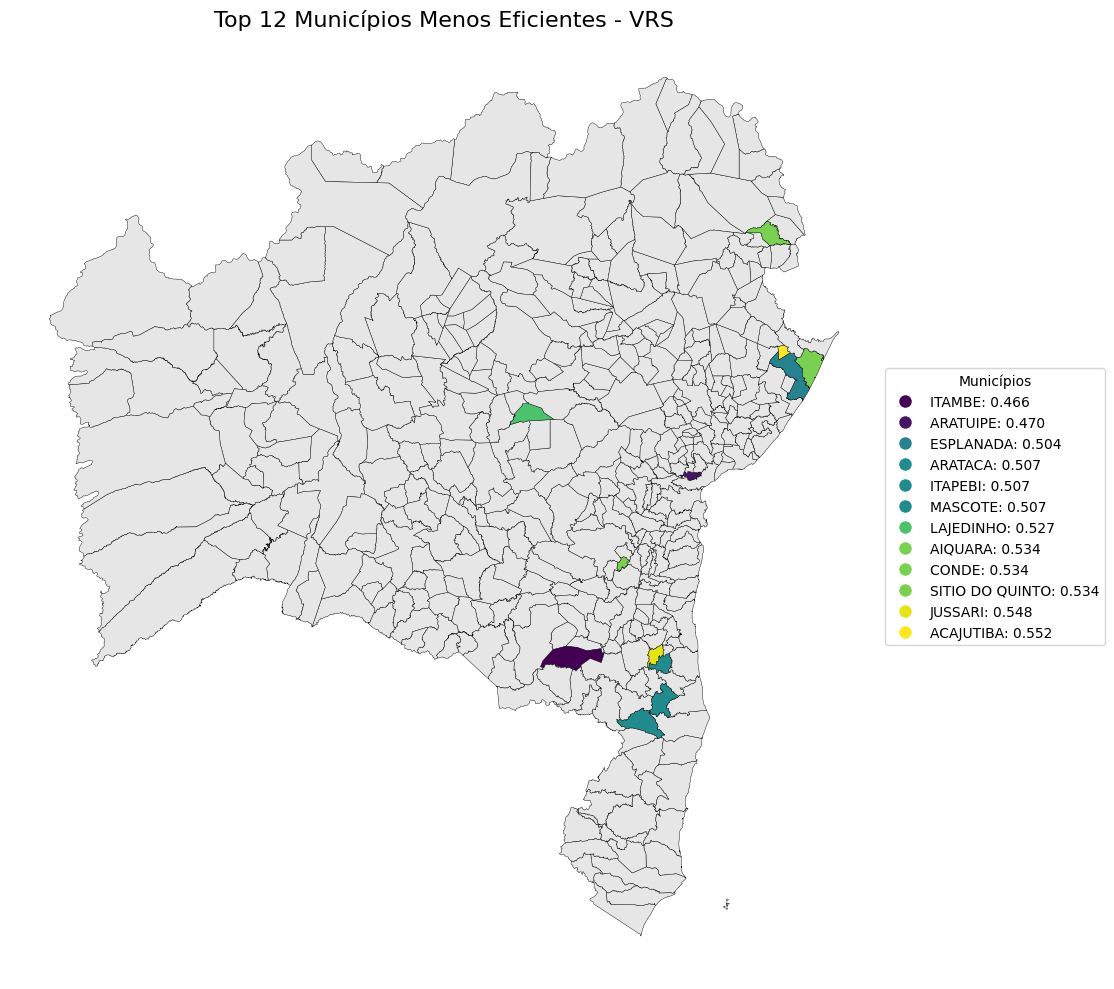

In [52]:

bottom7_vrs = dados_dea.sort_values("Score_VRS").head(18)


mapa_bottom_vrs = mapa_bahia.merge(dados_dea, left_on="NM_MUNICIP", right_on="Munic√≠pio", how="left")


mapa_bottom_vrs["is_bottom7"] = mapa_bottom_vrs["NM_MUNICIP"].isin(bottom7_vrs["Munic√≠pio"])


norm = Normalize(vmin=bottom7_vrs["Score_VRS"].min(), vmax=bottom7_vrs["Score_VRS"].max())
cmap = colormaps.get_cmap("viridis")


mapa_bottom_vrs["color"] = mapa_bottom_vrs.apply(
    lambda row: cmap(norm(row["Score_VRS"])) if row["is_bottom7"] else (0.9, 0.9, 0.9, 1), axis=1
)


fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa_bottom_vrs.plot(color=mapa_bottom_vrs["color"], linewidth=0.3, edgecolor='black', ax=ax)
ax.set_title("Top 12 Munic√≠pios Menos Eficientes - VRS", fontsize=16)
ax.axis("off")


legenda_bottom_vrs = mapa_bottom_vrs[mapa_bottom_vrs["is_bottom7"]].sort_values("Score_VRS")
patches = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=row['color'], markersize=10,
               label=f"{row['NM_MUNICIP']}: {row['Score_VRS']:.3f}")
    for _, row in legenda_bottom_vrs.iterrows()
]
ax.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5), title="Munic√≠pios")
plt.tight_layout()
plt.show()


# Top 12 Munic√≠pios Menos Eficientes (VRS)
Este mapa apresenta os 12 munic√≠pios menos eficientes segundo o modelo VRS, destacando aqueles que mais precisam otimizar a gest√£o educacional.
## Principais munic√≠pios com baixa efici√™ncia:
- Itamb√© (Score: 0.466) ‚Äî O munic√≠pio menos eficiente no modelo VRS, apresentando dificuldades na convers√£o de recursos em qualidade educacional.
- Aratu√≠pe, Esplanada e Arataca (Scores entre 0.470 e 0.507) ‚Äî Munic√≠pios que mostram baixa efici√™ncia na rela√ß√£o entre investimentos e IDEB, sugerindo necessidade de melhorias na gest√£o p√∫blica.
- Conde, Lajedinho e Aiquara (Scores entre 0.527 e 0.534) ‚Äî Apesar de apresentarem melhores indicadores que os anteriores, ainda precisam de ajustes para alcan√ßar um n√≠vel de efici√™ncia satisfat√≥rio.
- Outros munic√≠pios como Jussari e Acajutiba (Score entre 0.548 e 0.552) est√£o pr√≥ximos de uma gest√£o mais eficiente, mas ainda precisam otimizar recursos para melhorar o desempenho educacional.

## Interpreta√ß√£o dos Resultados:
- Munic√≠pios com baixa efici√™ncia no modelo VRS indicam que os gastos educacionais n√£o est√£o sendo convertidos em desempenho proporcional.
- Alguns munic√≠pios apresentam indicadores melhores que os outros, sugerindo que pequenos ajustes nas pol√≠ticas educacionais podem resultar em melhoria significativa.
- Esse mapa serve como um diagn√≥stico para gestores p√∫blicos, mostrando onde direcionar esfor√ßos para aumentar a efici√™ncia na aloca√ß√£o de recursos educacionais.


